In [8]:
library(data.table)
library(ggplot2)
library(qvalue)
library(pheatmap)
library(gridExtra)
library(dplyr)
library(reshape2)
options(stringsAsFactors = FALSE)
require("RColorBrewer")


Loading required package: RColorBrewer


## Get cis eQTL overlap

In [2]:
cts=c('PBMC', 'B', 'cM', 'ncM', 'Th', 'Tc', 'cDC', 'MK', 'NK')


In [3]:
load_data <- function(ct, dir){
    res=fread(paste(dir, ct, '.empirical.pval.txt', sep=''))
    res$FDR=qvalue(res$Empirical)$qvalues
    qtls=fread(paste(dir, ct, '.all.results.txt', sep=''))   
    
 #   best=res[!duplicated(res$gene), ]
    return(list(all=qtls, emp=res))
}


load_data_res <- function(ct, dir){
#    res=fread(paste(dir, ct, '.empirical.pval.txt', sep=''))
#    res$FDR=qvalue(res$Empirical)$qvalues
    qtls=fread(paste(dir, ct, '.all.results.txt', sep=''))    

 #   best=res[!duplicated(res$gene), ]
    return(list(all=qtls))
}


#get unique eQTL genes given FDR threshold
getUnique<- function(obj, ct, thresh=0.1){
    eqtls=obj[[ct]]$emp
    genes=eqtls[which(eqtls$FDR < thresh), ]$Actual
    genes=sapply(strsplit(genes, '_'), '[', 2)
    return(genes)
}

dir='/ye/yelabstore3/10x.lupus/eqtls/v5/sle.10pcs/all/'
sle=list()
for(ct in cts){
    print(ct)
    sle[[ct]]=load_data(ct, dir)
}




[1] "PBMC"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "B"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "cM"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "ncM"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "Th"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "Tc"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "cDC"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "MK"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "NK"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

In [4]:
cts_use=cts[-1]
n_cts=length(cts_use)

mat=matrix(0, nrow=n_cts, ncol=n_cts)
rownames(mat)=colnames(mat)=cts[-1]


for(i in 1:n_cts){
    for(j in 1:n_cts){
        g1=getUnique(sle, cts_use[i])
        g2=getUnique(sle, cts_use[j])
        mat[i, j]=length(intersect(g1, g2))
        
    }
}

mat

,B,cM,ncM,Th,Tc,cDC,MK,NK
B,538,328,234,297,302,134,26,171
cM,328,1686,630,524,532,264,29,238
ncM,234,630,889,353,339,221,26,186
Th,297,524,353,1118,627,177,30,260
Tc,302,532,339,627,1180,168,30,284
cDC,134,264,221,177,168,337,26,120
MK,26,29,26,30,30,26,39,27
NK,171,238,186,260,284,120,27,403


## Get GCTA pairwise results

In [5]:
final=fread('/ye/yelabstore3/gracieg/bivarH2/GCTA.std.eqtl.genes.h2.txt')




Warning message in fread("/ye/yelabstore3/gracieg/bivarH2/GCTA.std.eqtl.genes.h2.txt"):
“Detected 17 column names but the data has 18 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

In [6]:
filter_std_err<-function(df,se_filter){
    tmp1=as.data.frame(filter(df,se1<se_filter))
    tmp2=as.data.frame(filter(tmp1,se2<se_filter))
    return(tmp2)
}


plot_cell_cell_scatter_hist<-function(df,cell, se_filt=2){
    avg_rG=c()
    avg_rG_w=c()
    avg_rE=c()
    avg_rE_w=c()
    var_rG=c()
    var_rE=c()
    avg_rG_FW=c()
    avg_rE_FW=c()
        
    df_tmp=filter_std_err(as.data.frame(filter(df,cell_pair==as.character(cell))),se_filt)
#    print(head(df_tmp))
    avg_rG=mean(as.numeric(df_tmp$rg))
    #avg_rG_w=c(avg_rG_w,median(as.numeric(inv_tmp$rg)))
    avg_rE=mean(as.numeric(df_tmp$re))
    #avg_rE_w=c(avg_rE_w,median(as.numeric(inv_tmp$re)))
    var_rG=var(as.numeric(df_tmp$rg))
    var_rE=var(as.numeric(df_tmp$re))
    all_avgs=as.data.frame((cbind(cell,avg_rG,var_rG,avg_rE,var_rE,(as.numeric(avg_rG)+as.numeric(avg_rE)))))
   
    return(all_avgs)
}


get_rG_mat<-function(df_outs){
    rG=as.data.frame(cbind(df_outs$cell, as.numeric(df_outs$avg_rG)))
    rE=as.data.frame(cbind(df_outs$cell, as.numeric(df_outs$avg_rE)))
    #print(head(rG))
    #print(head(rE))
    
    colnames(rG)=c('cell_pair','rg')
    colnames(rE)=c('cell_pair','re')
    
    cells =(unique(unlist(strsplit(as.character(rG$cell_pair),"_",fixed=TRUE))))
    size_mat=length(cells)

    mat_rG=matrix(0,size_mat,size_mat)
    mat_rE=matrix(0,size_mat,size_mat)
    print(cells)
    rownames(mat_rG)=cells
    colnames(mat_rG)=cells
    rownames(mat_rE)=cells
    colnames(mat_rE)=cells
    
    for(c in cells){
        mat_rG[c,c]=1
        mat_rE[c,c]=1
    }    
    iter=1
    for(p in pairs){
        val_rg=(rG$rg[iter])
        val_rE=(rE$re[iter])
        
        name=(unlist(strsplit(as.character(p),"_",fixed=TRUE)))
        r=(name[1])
        c=(name[2])

        mat_rG[r,c]=as.numeric(val_rg)
        mat_rG[c,r]=as.numeric(val_rg)
        mat_rE[r,c]=as.numeric(val_rE)
        mat_rE[c,r]=as.numeric(val_rE)
        
        iter=iter+1
    }
    
    return(mat_rG)
    
}
    

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

#     #uncomment for all cells
#     #mat2_rG=mat_rG
#     #mat2_rE=mat_rE
    
#     #print(mat2_rG)
#     #print(mat2_rE)
#     diag(mat2_rG)=NA
#     o=pheatmap(mat2_rG,breaks=seq(0, 1, by = 0.02), cluster_col = T, cluster_row = T)
#     print(o)
#     o=pheatmap(mat2_rG, cluster_col = T, cluster_row = T)
#     print(o)
#     save_pheatmap_pdf(o,"/Users/marygordon/Documents/YeLab/scMPRA/Writeups/figures/GCTA_rG.pdf")
#     dat <- mat2_rG
#     row.order <- hclust(dist(mat2_rG))$order
#     col.order <- hclust(dist(t(mat2_rG)))$order
#     row.order2 <- hclust(dist(mat2_rE))$order
#     col.order2 <- hclust(dist(t(mat2_rE)))$order
   
#     #cluster mat
#     rname=c()
#     for(i in row.order){
#         #print(i)
#         rname=c(rname,(rownames(mat2_rE)[i]))
#     }
#     #cluster by rG
#     mat2_rG=mat2_rG[row.order, col.order]
    
#     rownames(mat2_rG)=rname
#     colnames(mat2_rG)=rname
    
#     #order based on rG order
#     mat2_rE=mat2_rE[row.order, col.order]
#     rownames(mat2_rE)=rname
#     colnames(mat2_rE)=rname

    
#     mat2_rG[lower.tri(mat2_rG)] = mat2_rE[lower.tri(mat2_rE)]
#     rownames(mat2_rG)=rname
#     colnames(mat2_rG)=rname
#     #rownames(mat2_rG)=rownames(mat2_rG)[row.order]
#     #colnames(mat2_rG)=colnames(mat2_rG)[row.order]
#     diag(mat2_rG)=NA
#     #print('lower tri')
#     #print(lower.tri(mat2_rE))
#     #print('final')
#     #print(mat2_rG)
    
#     #p=pheatmap(mat2,breaks=seq(.9, 1, by = 0.005))
#     #p=pheatmap(mat2,breaks=seq(.85, 1, by = 0.01))
#     #p=pheatmap(mat2,breaks=seq(-0.2, 0.2, by = 0.005))
#     #p=pheatmap(mat2_rG,breaks=seq(0, 1, by = 0.01))
#     #p=pheatmap(mat2_rG,breaks=seq(-0.2, 1, by = 0.02), cluster_col = F, cluster_row = F)
#     p=pheatmap(mat2_rG, cluster_col = F, cluster_row = F)
#     print(p)
#     save_pheatmap_pdf(p,"/Users/marygordon/Documents/YeLab/scMPRA/Writeups/figures/GCTA_rG_rE.pdf")

#  }




 [1] "B.cells_CD14+.Monocytes"           "B.cells_CD4.T.cells"              
 [3] "B.cells_CD8.T.cells"               "B.cells_Dendritic.cells"          
 [5] "B.cells_FCGR3A+.Monocytes"         "B.cells_NK.cells"                 
 [7] "CD14+.Monocytes_CD4.T.cells"       "CD14+.Monocytes_CD8.T.cells"      
 [9] "CD14+.Monocytes_Dendritic.cells"   "CD14+.Monocytes_FCGR3A+.Monocytes"
[11] "CD14+.Monocytes_NK.cells"          "CD4.T.cells_CD8.T.cells"          
[13] "CD4.T.cells_Dendritic.cells"       "CD4.T.cells_FCGR3A+.Monocytes"    
[15] "CD4.T.cells_NK.cells"              "CD8.T.cells_Dendritic.cells"      
[17] "CD8.T.cells_FCGR3A+.Monocytes"     "CD8.T.cells_NK.cells"             
[19] "Dendritic.cells_FCGR3A+.Monocytes" "Dendritic.cells_NK.cells"         
[21] "FCGR3A+.Monocytes_NK.cells"       
[1] "B.cells"           "CD14+.Monocytes"   "CD4.T.cells"      
[4] "CD8.T.cells"       "Dendritic.cells"   "FCGR3A+.Monocytes"
[7] "NK.cells"         


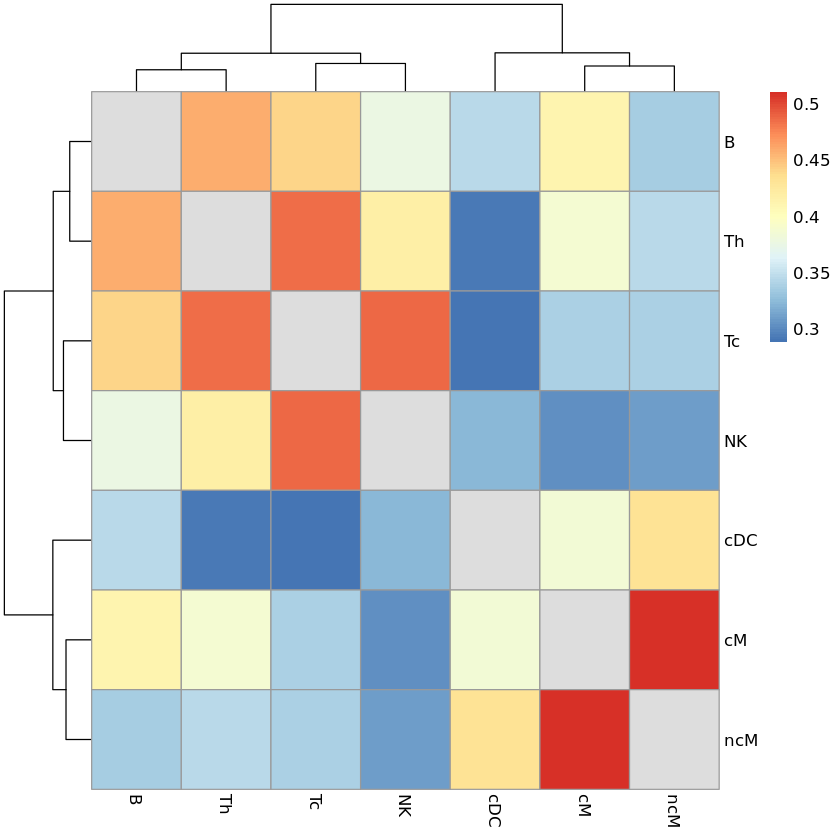

png 
  2

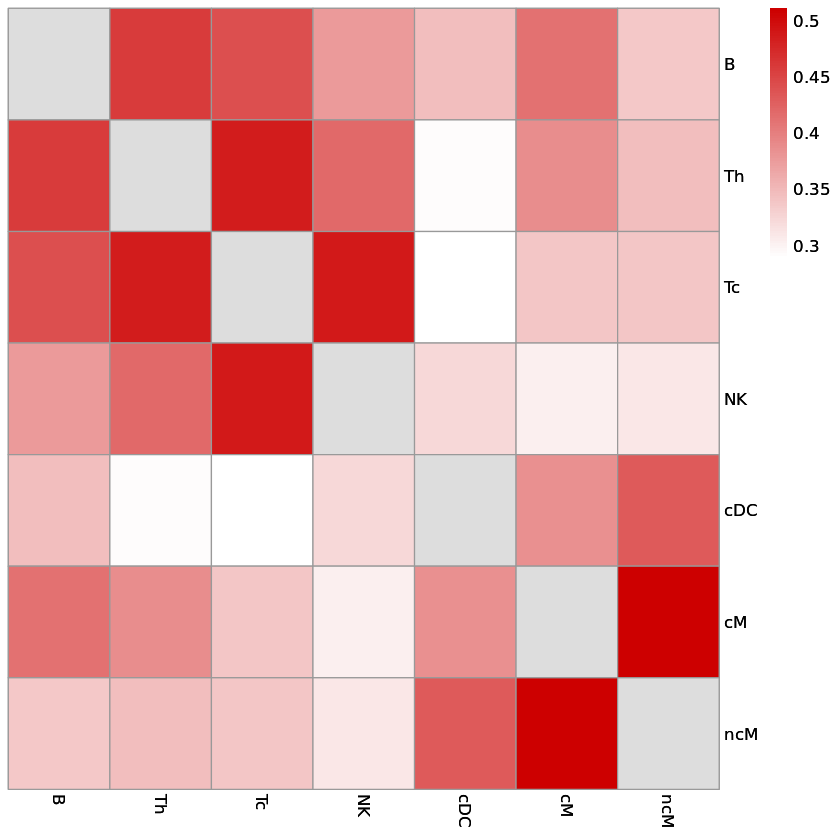

In [22]:
pairs=unique(final$cell_pair)
pairs=pairs[grep('PBMC',pairs, invert=T)]
pairs=pairs[grep('Megakaryocytes',pairs, invert=T)]

print(pairs)

all.df=NULL
for(p in pairs){
    all.df=rbind(all.df, plot_cell_cell_scatter_hist(final, p))
}

mat_gcta=get_rG_mat(all.df)

rownames(mat_gcta)=colnames(mat_gcta)=c('B', 'cM', 'Th', 'Tc', 'cDC', 'ncM', 'NK')

diag(mat_gcta)=NA
hm=pheatmap(mat_gcta)

order_cts=rownames(mat_gcta)[hm$tree_row$order]

ph=pheatmap(mat_gcta[order_cts, order_cts], color = colorRampPalette(c('white', 'red3'))(100), cluster_rows=F, cluster_cols = F)
print(ph)
save_pheatmap_pdf(ph, 'figures/rG.heatmap.nodend.pdf')



In [12]:
myCol <- colorRampPalette(c("white", "red"))(100)


[1] -2.00 -1.96 -1.92 -1.88 -1.84 -1.80 -1.76 -1.72 -1.68 -1.64 -1.60 -1.56
 [13] -1.52 -1.48 -1.44 -1.40 -1.36 -1.32 -1.28 -1.24 -1.20 -1.16 -1.12 -1.08
 [25] -1.04 -1.00 -0.96 -0.92 -0.88 -0.84 -0.80 -0.76 -0.72 -0.68 -0.64 -0.60
 [37] -0.56 -0.52 -0.48 -0.44 -0.40 -0.36 -0.32 -0.28 -0.24 -0.20 -0.16 -0.12
 [49] -0.08 -0.04  0.00  0.04  0.08  0.12  0.16  0.20  0.24  0.28  0.32  0.36
 [61]  0.40  0.44  0.48  0.52  0.56  0.60  0.64  0.68  0.72  0.76  0.80  0.84
 [73]  0.88  0.92  0.96  1.00  1.04  1.08  1.12  1.16  1.20  1.24  1.28  1.32
 [85]  1.36  1.40  1.44  1.48  1.52  1.56  1.60  1.64  1.68  1.72  1.76  1.80
 [97]  1.84  1.88  1.92  1.96  2.00

,B,Th,Tc,NK,cDC,cM,ncM
B,538,297,302,171,134,328,234
Th,297,1118,627,260,177,524,353
Tc,302,627,1180,284,168,532,339
NK,171,260,284,403,120,238,186
cDC,134,177,168,120,337,264,221
cM,328,524,532,238,264,1686,630
ncM,234,353,339,186,221,630,889


png 
  2

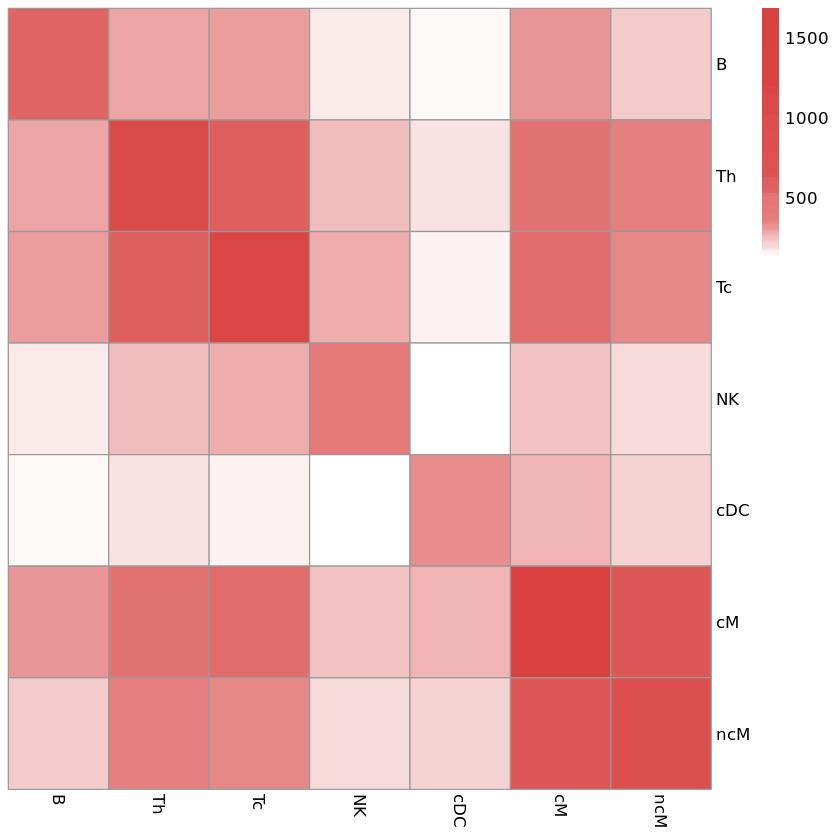

In [23]:
eqtl_mat.ordered=mat[match(order_cts, rownames(mat)), match(order_cts, colnames(mat))]
eqtl_mat.ordered

quantile_breaks <- function(xs, n = 10) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(eqtl_mat.ordered, n = 100)



ph2=pheatmap(eqtl_mat.ordered, cluster_rows = F, cluster_cols=F, breaks=mat_breaks, color = colorRampPalette(c('white', 'red3'))(100))

save_pheatmap_pdf(ph2, 'figures/eqtl.overlap.heatmap.pdf')
